In [ ]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("nikhilbhathi/data-scientist-salary-us-glassdoor")

print("Path to dataset files:", path)

100%|██████████| 1.00M/1.00M [00:00<00:00, 78.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor/versions/1


In [ ]:
import pandas as pd
df=pd.read_csv("data_cleaned_2021.csv")
df.shape
df.head(20)
df.info()
df.isna().sum()

FileNotFoundError: [Errno 2] No such file or directory: 'data_cleaned_2021.csv'

In [ ]:
import pandas as pd
import numpy as np

header= ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style", "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type", "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

df=pd.read_csv("/content/dataset_1 (1).data", names= header)
#to see what the data looks like
df.head()

#removing data impurities/data cleaning
#replace "?" to NaN
df.replace("?", np.nan, inplace=True)# if we dont use inplace then the changes will only be temporary
df.head()
missing_data= df.isnull()
df.notnull()




,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
201,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
202,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
203,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
#counting missing values in each column
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print(" ")

symboling
symboling
False    205
Name: count, dtype: int64
 
normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64
 
make
make
False    205
Name: count, dtype: int64
 
fuel-type
fuel-type
False    205
Name: count, dtype: int64
 
aspiration
aspiration
False    205
Name: count, dtype: int64
 
num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64
 
body-style
body-style
False    205
Name: count, dtype: int64
 
drive-wheels
drive-wheels
False    205
Name: count, dtype: int64
 
engine-location
engine-location
False    205
Name: count, dtype: int64
 
wheel-base
wheel-base
False    205
Name: count, dtype: int64
 
length
length
False    205
Name: count, dtype: int64
 
width
width
False    205
Name: count, dtype: int64
 
height
height
False    205
Name: count, dtype: int64
 
curb-weight
curb-weight
False    205
Name: count, dtype: int64
 
engine-type
engine-type
False    205
Name: count, dtype: int64
 
num-of-cylinders
num-of-cylinders
F

In [ ]:
# for missing data
from sklearn.impute import SimpleImputer #in impute class, package=simpleimpute
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']])
#kinda like inplace =true for sklearn lib since it doesnt have any predefined function(next line)
df[['normalised-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']]=imputer.transform(df[['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']])

In [ ]:
from sklearn.impute import SimpleImputer #in impute class, package=simpleimpute
imputer= SimpleImputer(missing_values=np.nan, strategy='most_frequency')
imputer.fit(df[['num-of-doors', 'price']])
#kinda like inplace =true for sklearn lib since it doesnt have any predefined function(next line)
df[['normalised-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']]=imputer.transform(df[['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']])
df.head()

Mileage (slope): 15.057142857142857
Base offset (intercept): 4.0


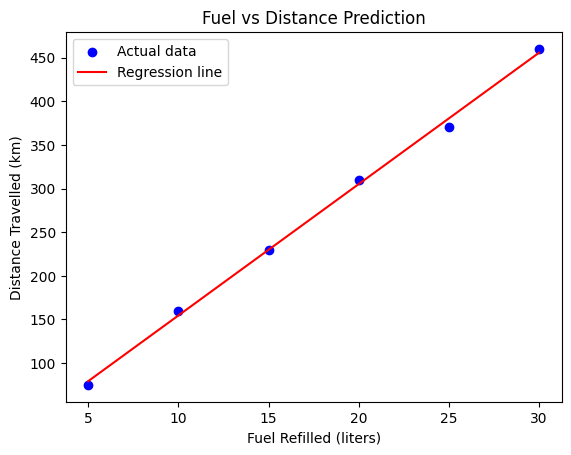

Predicted distance for 40 liters = 606.29 km


In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example data (Fuel in liters vs Distance in km)
# Independent variable (X): fuel
fuel = np.array([5, 10, 15, 20, 25, 30]).reshape(-1, 1)

# Dependent variable (Y): distance
# Suppose car mileage ~ 15 km/l (with slight random variation)
distance = np.array([75, 160, 230, 310, 370, 460])

# Create linear regression model
model = LinearRegression()
model.fit(fuel, distance)

# Predictions
predicted = model.predict(fuel)

# Print model parameters
print("Mileage (slope):", model.coef_[0])
print("Base offset (intercept):", model.intercept_)

# Plot
plt.scatter(fuel, distance, color='blue', label="Actual data")
plt.plot(fuel, predicted, color='red', label="Regression line")
plt.xlabel("Fuel Refilled (liters)")
plt.ylabel("Distance Travelled (km)")
plt.title("Fuel vs Distance Prediction")
plt.legend()
plt.show()

# Test prediction
test_fuel = np.array([[40]])  # 40 liters
predicted_distance = model.predict(test_fuel)
print(f"Predicted distance for 40 liters = {predicted_distance[0]:.2f} km")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
x=load_iris().data #independent variable
y=load_iris().target # dependant variable

In [ ]:
load_iris().target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictiocs = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictiocs))
print("Classification Report:\n", classification_report(y_test, predictiocs))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictiocs))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
df=pd.read_csv("/content/iris.csv") #anagram, anscope, attention, brain datassets


In [ ]:

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

digits = datasets.load_digits()
X = digits.data
Y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, ytest_size= 0.3, random_state=[]
)

scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
y_test= scaler.tranform(X_test)

k=5
knn= KNeighborsClassifier(n_neighbors=)
knn.fit(X_train, y_test)

print("\nmodel accuracy:", accuracy_score(X_train, y_test))
print("\nConfusion Matrix:", confusion_matrix(y))


